## 音あり・なし試行でマウスがレバーを引いた瞬間の脳領域の活動を可視化

音あり・なし試行でマウスがレバーを引いた瞬間の脳活動の違いを可視化します

In [ ]:
# ===================================================================
# 共通セットアップセル (ローカル / Colab 共通)
# ===================================================================
import sys
import os
from pathlib import Path

# --- 1. 環境判別 ---
IN_COLAB = False
try:
    # Colab環境でのみインポートが成功する
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    pass # ローカル環境


if IN_COLAB:
    # ==================================
    # Colab 環境でのセットアップ
    # ==================================
    print("環境: Colab を検出。セットアップを開始します。")

    # 1. Google Driveのマウント
    drive.mount('/content/drive')

    # 2. GitHubリポジトリのクローンまたはプル
    repo_path = Path('/content/braidyn-bc')
    if repo_path.exists():
        print("リポジトリを pull します...")
        os.chdir(repo_path)
        !git pull
    else:
        print("リポジトリを clone します...")
        !git clone https://github.com/nyaamikeneko/braidyn-bc.git
        os.chdir(repo_path)

    # 3. 依存ライブラリのインストール
    print("依存ライブラリをインストールします...")
    !pip install -q pynwb git+https://github.com/BraiDyn-BC/bdbc-nwb-explorer.git

    # 4. sys.path の設定
    project_root = repo_path
    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"セットアップ完了。プロジェクトルート: {project_root}")

else:
    # ==================================
    # ローカル (VSCode) 環境でのセットアップ
    # ==================================
    print("環境: ローカル (VSCode) を検出。")

    # 1. sys.path の設定
    current_dir = Path.cwd()
    if current_dir.name == 'notebooks':
        # ノートブックが notebooks/ から実行された場合
        project_root = current_dir.parent
    else:
        # プロジェクトルート (braidyn-bc/) から実行されたと仮定
        project_root = current_dir

    if str(project_root) not in sys.path:
        sys.path.append(str(project_root))

    print(f"プロジェクトルート: {project_root}")

# ===================================================================
# 共通インポート・処理
# (セットアップが完了したため、config.py や src/ が読み込める)
# ===================================================================
print("\n共通モジュールをインポートします...")

import bdbc_nwb_explorer as nwbx
import src.data_loader as dl
import config  # config.py もここで読み込める

print(f"データパス (DATA_NWB_ROOT): {config.DATA_NWB_ROOT}")

環境: Colab を検出。セットアップを開始します。
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
リポジトリを pull します...
Already up to date.
依存ライブラリをインストールします...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
セットアップ完了。プロジェクトルート: /content/braidyn-bc

共通モジュールをインポートします...
データパス (DATA_NWB_ROOT): /content/drive/MyDrive/braidyn-bc/data


In [ ]:
# --- 必要なデータを関数で読み出す ---
SESSION_ID = "VG1GC-105"
NWB_FILENAME = "VG1GC-105_2024-02-02_task-day8.nwb"
TASK_DAY_DIR = "task-day8"

# NWBデータの読み込み
# (dl は共通セルでインポート済み)
session = dl.load_nwb_session(SESSION_ID, NWB_FILENAME)

# CSVデータの読み込み
trials = dl.load_trials_csv(SESSION_ID, TASK_DAY_DIR)

# これ以降、 session や trials を使った分析処理を記述...
if trials is not None:
    print(trials.head())

In [ ]:
# # 適当にテストNWBファイルを選択
# dataroot = Path('/content/drive/MyDrive/braidyn-bc/data')
# testfile = dataroot / "VG1GC-105" / "VG1GC-105_2024-02-02_task-day8.nwb"
# # bdbc-nwb-explorerを使って読み込み
# print("--> reading...", end=' ', flush=True)
# start = now()
# session = nwbx.read_nwb(testfile)
# stop = now()
# print(f"done (took {(stop - start) / 60:.1f} min)", flush=True)
# session

# all_rois = session.imaging.data

# successだった試行の抽出
#trials = session.trials.data
#success = trials.loc[trials.trial_outcome == "success"]



音無し試行の可視化です。

(trials['state_task'] == 0) & (trials['diff_value'] > 0.4)を条件に試行を抽出しています

/usr/local/lib/python3.11/dist-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


全試行数: 54000
フィルタリング後の試行数: 200
lever_time_nocueの先頭5行:
              t  diff_value  lever_time_nocue
101   8.578400    0.733200          7.845200
377  17.778601    0.666801         17.111799
649  26.845200    0.799999         26.045200
745  30.045200    0.666601         29.378599
895  35.045399    1.033398         34.012001


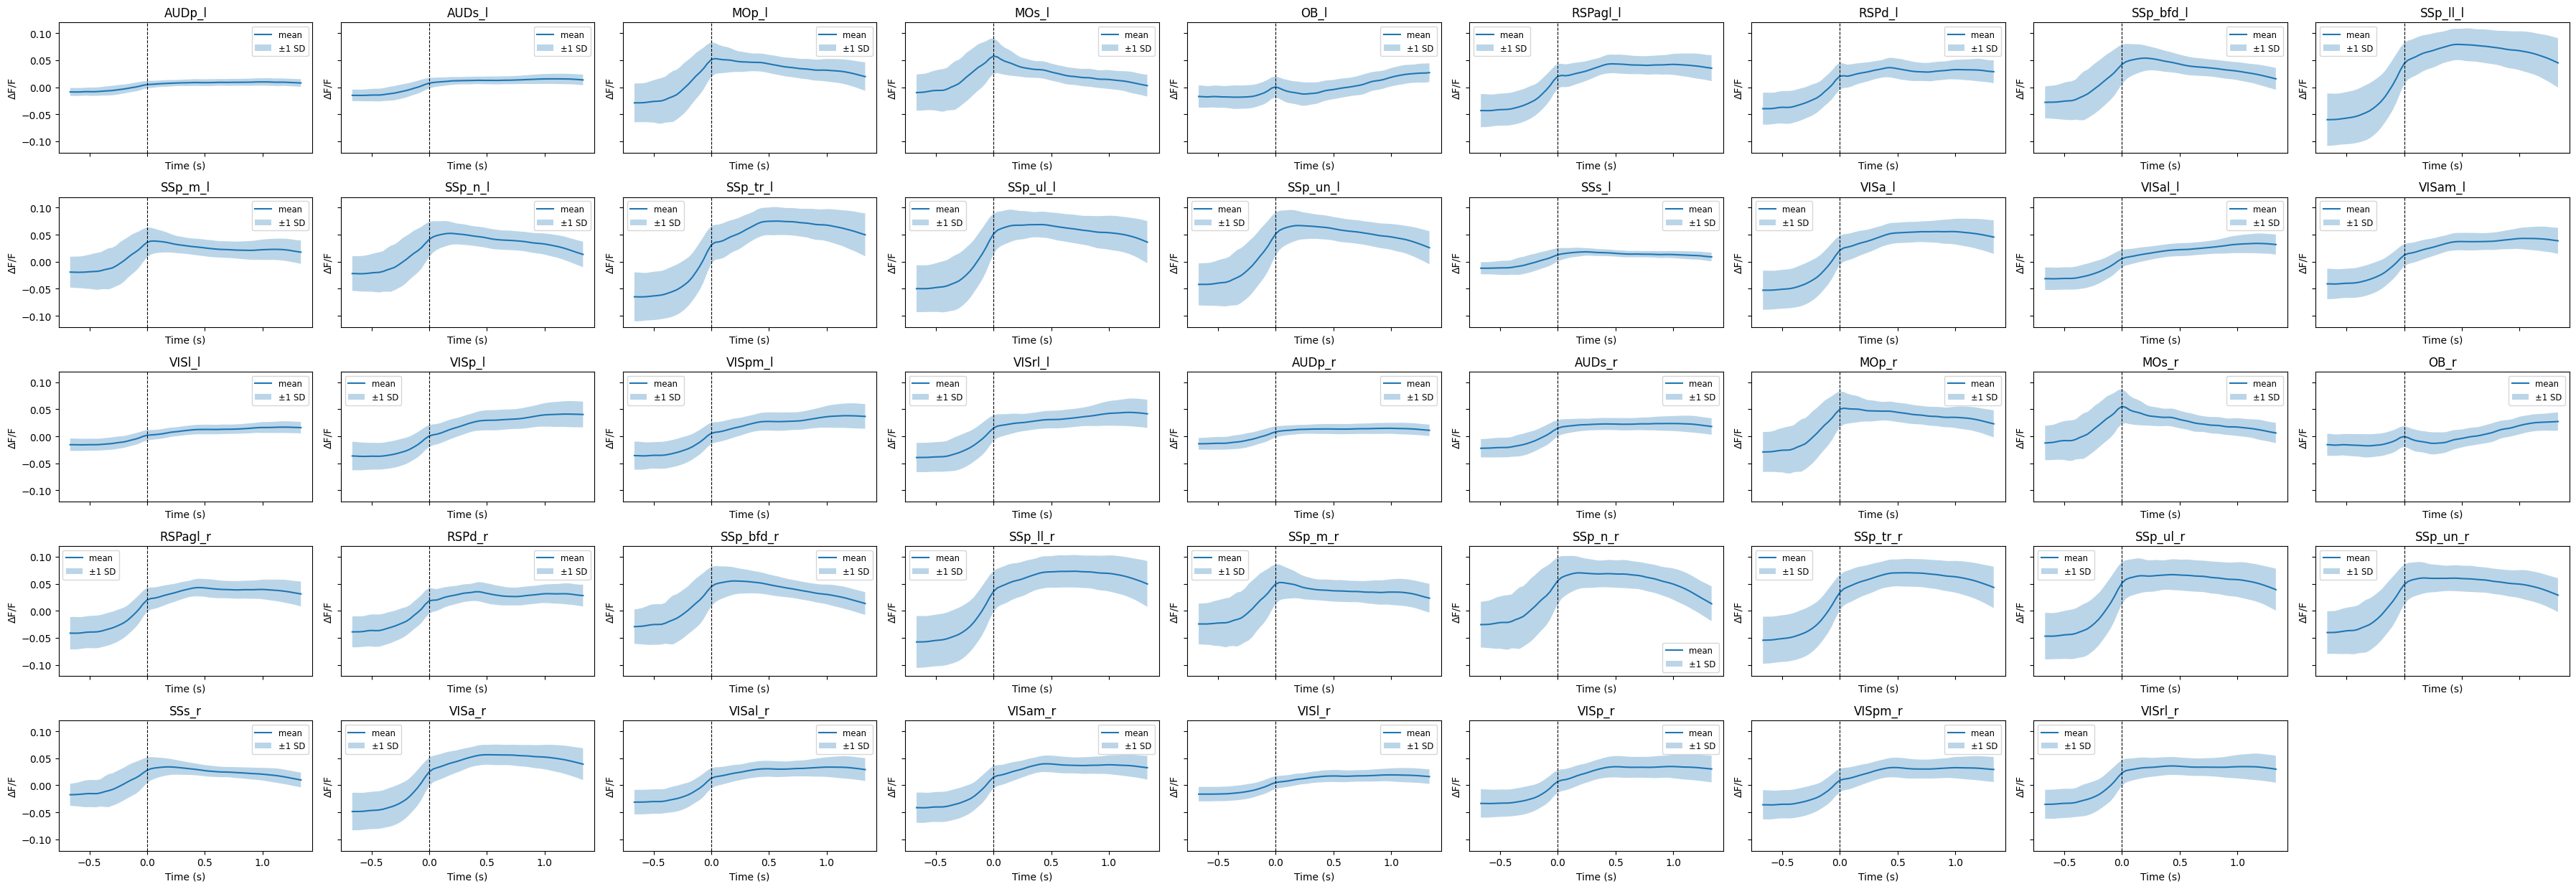

In [ ]:
#音無しレバー引き課題

import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import pandas as pd

# # 適当にテストNWBファイルを選択
dataroot = Path('/content/drive/MyDrive/braidyn-bc/data')
testfile = dataroot / "VG1GC-105" / "VG1GC-105_2024-02-02_task-day8.nwb"
session = nwbx.read_nwb(testfile)



# CSVファイルの読み込み
csv_path = Path('/content/drive/MyDrive/hackathon_data/VG1GC-105/task-day8/trials_L1L2.csv')
trials = pd.read_csv(csv_path)
print("全試行数:", len(trials))

# 条件に合致する行のフィルタリング
filtered_trials = trials[(trials['state_lever']==1) &
                         (trials['state_task'] == 0) &
                         (trials['diff_value'] > 0.4)].copy()
print("フィルタリング後の試行数:", len(filtered_trials))

# lever_time_nocueの算出：tからdiff_valueを引いた時刻
filtered_trials['lever_time_nocue'] = filtered_trials['t'] - filtered_trials['diff_value']
print("lever_time_nocueの先頭5行:\n", filtered_trials[['t', 'diff_value', 'lever_time_nocue']].head())

# 脳活動データ（各ROIの時系列データ）の取得
all_rois = session.imaging.data  # DataFrame形式と仮定

# --- 時間軸生成 ---
imaging_t = all_rois.index.to_numpy()

# プロット用パラメータ
pre_samples  = 20   # レバー引き前のサンプル数
post_samples = 40   # レバー引き後のサンプル数
window_len   = pre_samples + post_samples + 1
time_axis    = (np.arange(window_len) - pre_samples) * (1/30)  # サンプリング30Hz想定

# ROIごとに試行×ウィンドウ長の配列をためる辞書
roi_trials = { roi: [] for roi in all_rois.columns }

for event_time in filtered_trials['lever_time_nocue']:
    idx0 = np.searchsorted(imaging_t, event_time)
    start, end = idx0 - pre_samples, idx0 + post_samples
    if start < 0 or end >= len(imaging_t):
        continue
    window = all_rois.iloc[start:end+1]
    for roi in all_rois.columns:
        roi_trials[roi].append(window[roi].values)

# ROIごとに平均と標準偏差を計算
roi_mean = {}
roi_std  = {}
for roi, trials_list in roi_trials.items():
    if len(trials_list)==0:
        continue
    arr = np.stack(trials_list)  # shape=(n_trials, window_len)
    roi_mean[roi] = np.nanmean(arr, axis=0)
    roi_std[roi]  = np.nanstd(arr, axis=0)

# サブプロット設定
n_rois = len(roi_mean)
n_cols = 9
n_rows = ceil(n_rois / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2.5), sharex=True, sharey=True)
axes = axes.flatten()

# プロットループ
for ax, roi in zip(axes, roi_mean.keys()):
    mean_ts = roi_mean[roi]
    std_ts  = roi_std[roi]
    ax.plot(time_axis, mean_ts, label='mean')
    ax.fill_between(time_axis,
                    mean_ts - std_ts,
                    mean_ts + std_ts,
                    alpha=0.3, label='±1 SD')
    ax.axvline(0, color='k', linestyle='--', linewidth=0.8)
    ax.set_title(roi)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ΔF/F')
    ax.legend(fontsize='small')

# 余分なサブプロットを非表示
for ax in axes[n_rois:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


横軸を時間にして各々の領域の活動を可視化しています（コード未確認）

音あり課題についても同様に可視化を行います。
データを読み込み直しています

lever_time_nocueの先頭5行:
                t  diff_value  pull_onset
564    24.011801         NaN   21.711800
1065   40.712002         NaN   38.411999
1480   54.545399         NaN   52.245399
2165   77.378998         NaN   75.079002
2939  103.179199         NaN  100.879204
event_time=21.712 → imaging_t[495]=21.712
event_time=38.412 → imaging_t[996]=38.412
event_time=52.245 → imaging_t[1411]=52.245
event_time=75.079 → imaging_t[2096]=75.079
event_time=100.879 → imaging_t[2870]=100.879


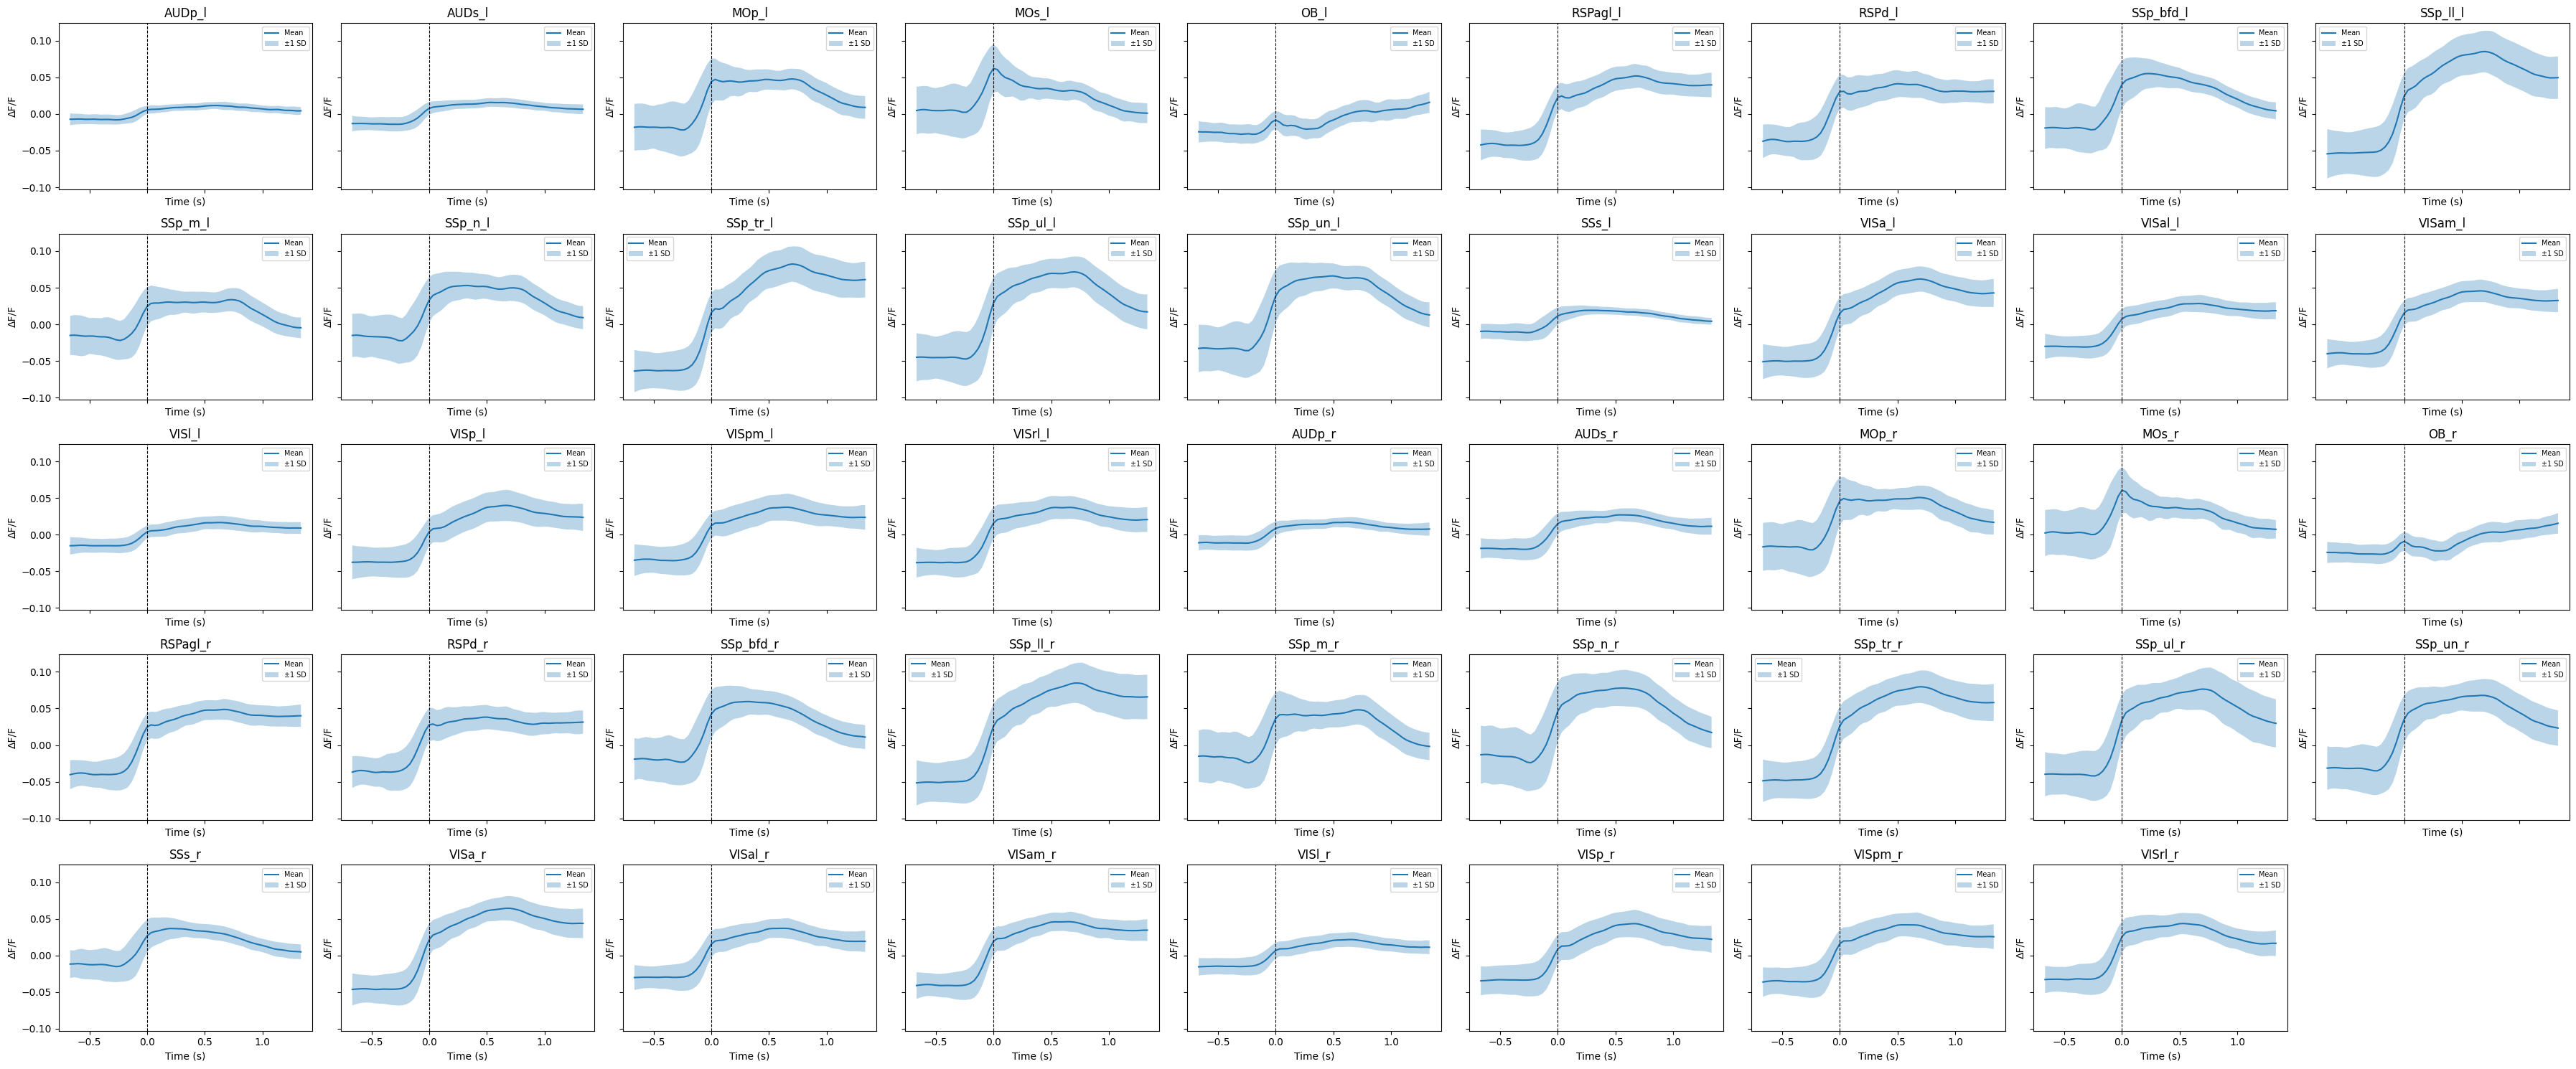

In [ ]:
#音ありレバー引き課題。インデックスの検証が不十分

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# # --- データ読み込み ---
# csv_path = Path('/content/drive/MyDrive/VG1GC-105/VG1GC-105/task-day8/trials_L1L2.csv')
# trials = pd.read_csv(csv_path)

# dataroot = Path('/content/drive/MyDrive/braidyn-bc/data')
# testfile = dataroot / "VG1GC-105" / "VG1GC-105_2024-02-02_task-day8.nwb"
# session = nwbx.read_nwb(testfile)

# # --- ROI 時系列データ取得 ---
# all_rois = session.imaging.data  # DataFrame: 各列が ROI、各行が時間サンプル

# # --- 時間軸生成 ---
# imaging_t = all_rois.index.to_numpy()

# --- trials フィルタリング ---
filtered = trials.dropna(subset=['trial_outcome'])
filtered = filtered[
    (filtered['first_diff'] > 1.0) &
    (filtered['reaction_time'] > 0.091) &
    (filtered['reaction_time'] < 0.361)
].copy()

print("lever_time_nocueの先頭5行:\n", filtered[['t', 'diff_value', 'pull_onset']].head())

# --- インデックス検証 (最初の5件) ---
for event_time in filtered['pull_onset'].values[:5]:
    idx = np.searchsorted(imaging_t, event_time)
    print(f"event_time={event_time:.3f} → imaging_t[{idx}]={imaging_t[idx]:.3f}")

# --- プロット用パラメータ ---
pre_samples  = 20   # pull_onset の前何サンプル
post_samples = 40   # pull_onset の後何サンプル
window_len   = pre_samples + post_samples + 1
fs           = 30   # サンプリングレート (Hz)
time_axis    = (np.arange(window_len) - pre_samples) / fs  # 秒

# --- ROIごとの試行データを収集 ---
roi_trials = { roi: [] for roi in all_rois.columns }

for event_time in filtered['pull_onset']:
    idx0 = np.searchsorted(imaging_t, event_time)
    start, end = idx0 - pre_samples, idx0 + post_samples
    if start < 0 or end >= len(imaging_t):
        continue
    window = all_rois.iloc[start:end+1]
    for roi in all_rois.columns:
        roi_trials[roi].append(window[roi].values)

# --- 平均と標準偏差を計算 ---
roi_mean = {}
roi_std  = {}
for roi, arr_list in roi_trials.items():
    if not arr_list:
        continue
    arr = np.stack(arr_list)  # shape = (n_trials, window_len)
    roi_mean[roi] = np.nanmean(arr, axis=0)
    roi_std[roi]  = np.nanstd(arr, axis=0)

# --- 描画 ---
n_rois = len(roi_mean)
n_cols = 9
n_rows = ceil(n_rois / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3), sharex=True, sharey=True)
axes = axes.flatten()

for ax, roi in zip(axes, roi_mean):
    mean_ts = roi_mean[roi]
    std_ts  = roi_std[roi]
    ax.plot(time_axis, mean_ts, label='Mean')
    ax.fill_between(time_axis,
                    mean_ts - std_ts,
                    mean_ts + std_ts,
                    alpha=0.3, label='±1 SD')
    ax.axvline(0, color='k', linestyle='--', lw=0.8)
    ax.set_title(roi)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ΔF/F')
    ax.legend(fontsize='x-small')

# 余分なサブプロットを非表示
for ax in axes[n_rois:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


レバー引き情報から抽出した時間情報と、脳活動の時間情報がすこしずれていたので確認しました

修正前後で誤差情報の変化を確認しています。
他のミスもないか確認しています

In [ ]:
# ── pull_onset と imaging_t の対応誤差 Δt を計算 ──
#timestamp修正した後
event_idx  = np.searchsorted(imaging_t, filtered['pull_onset'])
nearest_ts = imaging_t[event_idx.clip(max=len(imaging_t)-1)]
dt         = nearest_ts - filtered['pull_onset'].values   # +なら imaging_t の方が遅い

print("Δt 5 件:", dt[:5])
print("Δt 統計 (秒)", pd.Series(dt).describe())


Δt 5 件: [0. 0. 0. 0. 0.]
Δt 統計 (秒) count    8.500000e+01
mean     2.674984e-15
std      1.495184e-14
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.136868e-13
dtype: float64


In [ ]:
check_df = pd.DataFrame({
    'pull_onset':    filtered['pull_onset'].reset_index(drop=True),
    'event_idx':     event_idx,
    'ts_at_idx':     nearest_ts,
    'dt_sec':        dt
})
display(check_df.head())


,pull_onset,event_idx,ts_at_idx,dt_sec
0,21.711800,495,21.711800,0.0
1,38.411999,996,38.411999,0.0
2,52.245399,1411,52.245399,0.0
3,75.079002,2096,75.079002,0.0
4,100.879204,2870,100.879204,0.0


音あり、なしの活動の違いを重ねて可視化したものです
（idxは正しい。仔細は未確認）

/usr/local/lib/python3.11/dist-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.7.0, loaded version: 2.8.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


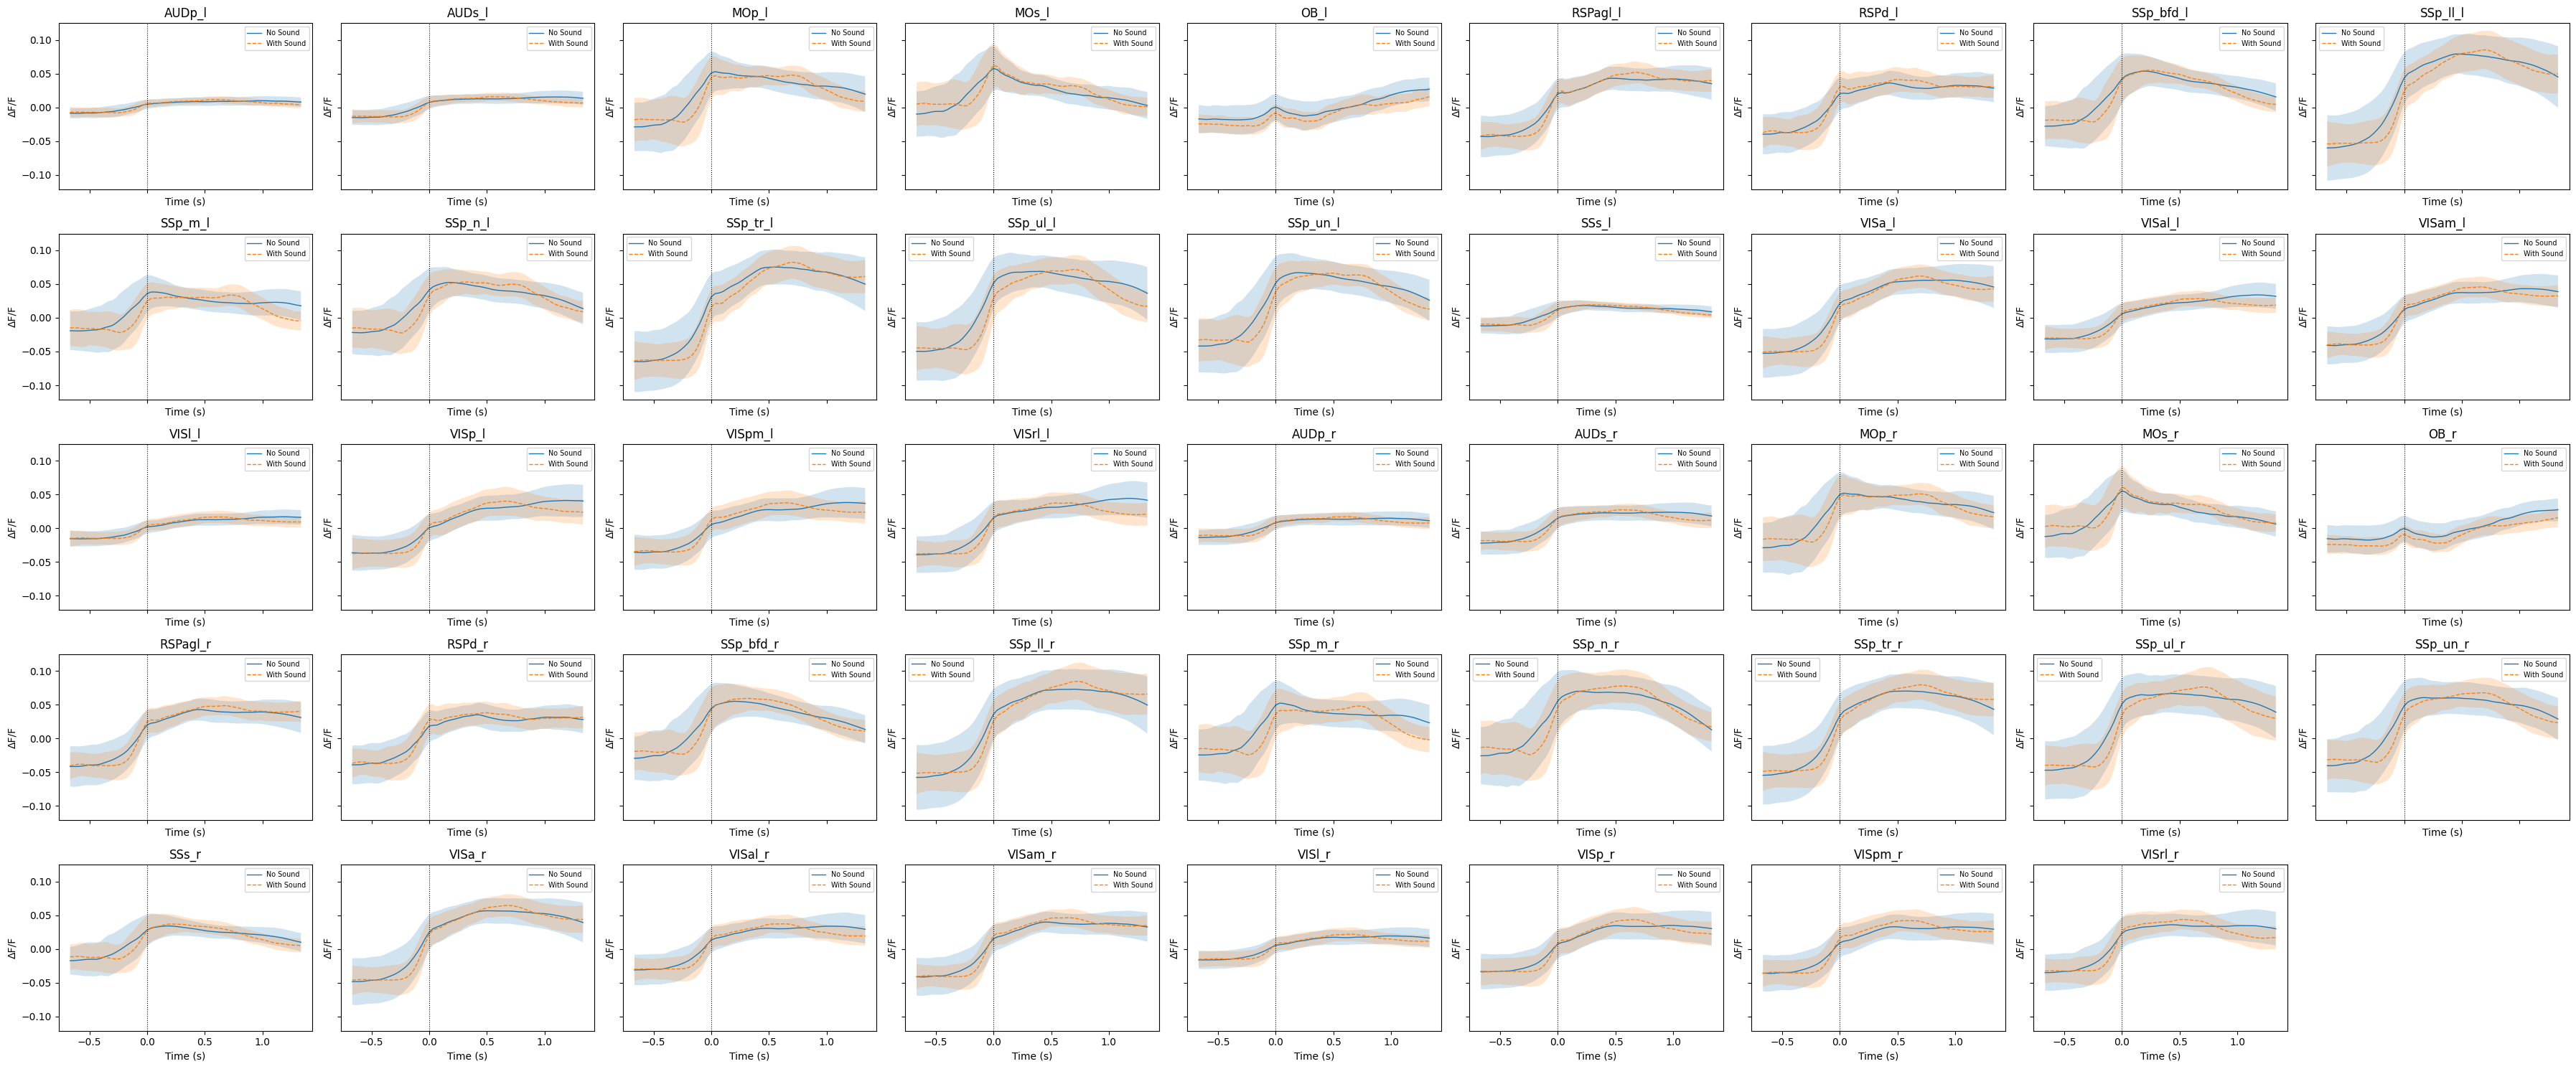

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from pathlib import Path

# --- データ読み込み ---
csv_path = Path('/content/drive/MyDrive/VG1GC-105/VG1GC-105/task-day8/trials_L1L2.csv')
trials = pd.read_csv(csv_path)

dataroot = Path('/content/drive/MyDrive/braidyn-bc/data')
testfile = dataroot / "VG1GC-105" / "VG1GC-105_2024-02-02_task-day8.nwb"
session = nwbx.read_nwb(testfile)
all_rois = session.imaging.data
imaging_t = all_rois.index.to_numpy()

# --- イベント時刻を２条件でつくる ---
# 音無し： state_task==0, diff_value>0.4 → lever_time_nocue
f_ns = trials[(trials['state_task']==0) & (trials['diff_value']>0.4)].copy()
f_ns['event_time'] = f_ns['t'] - f_ns['diff_value']

# 音有り： reaction_time の閾内試行 → pull_onset
f_s  = trials.dropna(subset=['trial_outcome'])
f_s  = f_s[(f_s['first_diff']>1.0)
           & (f_s['reaction_time']>0.091)
           & (f_s['reaction_time']<0.361)].copy()
f_s['event_time'] = f_s['pull_onset']

# --- ウィンドウ定義 ---
pre_samps  = 20   # pull 前サンプル数
post_samps = 40   # pull 後サンプル数
wnd_len    = pre_samps + post_samps + 1
fs         = 30   # Hz（実データに合わせて）
time_axis  = (np.arange(wnd_len) - pre_samps) / fs

# --- ROIごとに試行データをためる ---
def collect_trials(event_times):
    d = {roi: [] for roi in all_rois.columns}
    for t0 in event_times:
        idx0 = np.searchsorted(imaging_t, t0)
        start, end = idx0-pre_samps, idx0+post_samps
        if start<0 or end>=len(imaging_t): continue
        win = all_rois.iloc[start:end+1]
        for roi in all_rois.columns:
            d[roi].append(win[roi].values)
    return d

trials_ns = collect_trials(f_ns['event_time'])
trials_s  = collect_trials(f_s['event_time'])

# --- 平均・SD を計算 ---
mean_ns, std_ns = {}, {}
mean_s,  std_s  = {}, {}
for roi in all_rois.columns:
    if trials_ns[roi]:
        arr = np.stack(trials_ns[roi])
        mean_ns[roi] = arr.mean(0)
        std_ns[roi]  = arr.std(0)
    if trials_s[roi]:
        arr = np.stack(trials_s[roi])
        mean_s[roi] = arr.mean(0)
        std_s[roi]  = arr.std(0)

# --- 描画 ---
rois = list(mean_ns.keys())  # 両方ある ROI のみなら filter してもOK
n = len(rois)
cols = 9
rows = ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), sharex=True, sharey=True)
axes = axes.flatten()

for ax, roi in zip(axes, rois):
    # 音無し
    ax.plot(time_axis, mean_ns[roi], label='No Sound', linewidth=1)
    ax.fill_between(time_axis,
                    mean_ns[roi]-std_ns[roi],
                    mean_ns[roi]+std_ns[roi],
                    alpha=0.2)
    # 音有り
    ax.plot(time_axis, mean_s[roi], label='With Sound', linestyle='--', linewidth=1)
    ax.fill_between(time_axis,
                    mean_s[roi]-std_s[roi],
                    mean_s[roi]+std_s[roi],
                    alpha=0.2)
    ax.axvline(0, color='k', linestyle=':', linewidth=0.8)
    ax.set_title(roi)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ΔF/F')
    ax.legend(fontsize='x-small')

# 余分なサブプロットをオフ
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()
